# Linear Discriminative Analysis (LDA)

While applying PCA, information loss as a whole is reduced, but there is a problem whenit comes to applying PCA in discriminative data (has class labels). If we have to perform classification, PCA won't do well. In PCA data points are projected such that they are as close as possible to each other. In simple, if data points of two differnt classs are brought close to each other, the discriminative presence in the data is lost.

LDA solves this issue. In LDA, we don't bring all the points as close as possible but rather try to keep the data points of the specific class as close as possible. This would automatically make the respective data points far from data points of opposite classes.

### Mathematics behind LDA

LDA tries to keep the data points of specific target class as far apart from the opposite classes. This is possible when the mean of the data-points are keept far apart.

```
max|µ1 − µ2|; The greater the distance of mean (centroid), LDA has increased the discriminative properties
```

Along with mean, variance can reduce the discriminative properties. Hence, varinace of the data points has to b kept small.

```
min |(V1) + (V2)|
```

Hence, in LDA, the suitable vector is found when the following eqn is satisfied
```
max|µ1 − µ2| / min |(V1) + (V2)|
```




In [14]:
import numpy as np
import matplotlib.pyplot as plt

class PCA:
  def __init__(self, n_components):
    self.n=n_components
    self.components=None

  def fit(self, x):
    self.mean=np.mean(x, axis=0)
    x=x-self.mean

    cov=np.cov(x.T)

    eigVec, eigVal = np.linalg.eig(cov)
    eigVec=eigVec.T

    idxs=np.argsort(eigVal)[::-1]
    eigVal=eigVal[idxs]
    eigVec=eigVec[idxs]

    self.components=eigVec[:self.n]
    return eigVec

  def transform(self, x):
    x=x-self.mean
    return np.dot(x, (self.components).T)

In [2]:
class LDA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None

    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)

        '''Finding Sw and Sb(mean difference and vraiation)'''
        mean_overall = np.mean(X, axis=0)
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))
        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)

            '''Variance vectors'''
            SW += (X_c - mean_c).T.dot((X_c - mean_c))

            '''Mean vectors'''
            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            SB += n_c * (mean_diff).dot(mean_diff.T)

        A = np.linalg.inv(SW).dot(SB)

        '''Eigen Problem'''
        eigenvalues, eigenvectors = np.linalg.eig(A)
        eigenvectors = eigenvectors.T
        idxs = np.argsort(abs(eigenvalues))[::-1]

        eigenvectors = eigenvectors[idxs]
        self.linear_discriminants = eigenvectors[0:self.n_components]

    def transform(self, X):
        return np.dot(X, self.linear_discriminants.T)

In [15]:
from sklearn import datasets
data=datasets.load_iris()

x=data.data
y=data.target

lda=LDA(3)
lda_components=lda.fit(x, y)
post_lda_x=lda.transform(x)

pca=PCA(2)
pca_components=pca.fit(x)
post_pca_x=pca.transform(x)

### Intresting Realationship between PCA and LDA

PCA and LDA behaves in similar ways as their final use case purpose is to pre-process (dimesninality reduction) of the data. But as their approches are pretty different, we can find intresting relationship between PCA and LDA

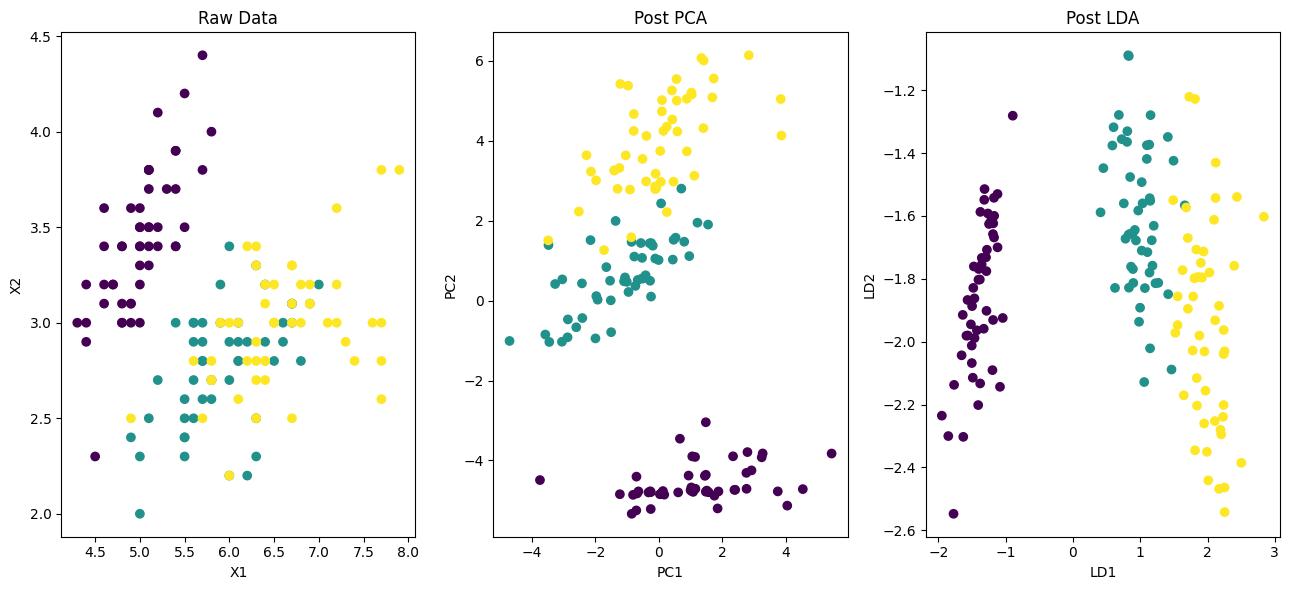

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 6))

axes[0].scatter(x[:,0],x[:,1], c=y, cmap='viridis')
axes[0].set_xlabel("X1")
axes[0].set_ylabel("X2")
axes[0].set_title('Raw Data')

axes[1].scatter(post_pca_x[:,0],post_pca_x[:,1], c=y, cmap='viridis')
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")
axes[1].set_title('Post PCA')

axes[2].scatter(post_lda_x[:,0],post_lda_x[:,1], c=y, cmap='viridis')
axes[2].set_xlabel("LD1")
axes[2].set_ylabel("LD2")
axes[2].set_title('Post LDA')

plt.tight_layout()
plt.show()


1. PCA is unsupervised as it doesn't require any labels or discriminative data to differentiate the data points. PCA's use case is to reduce dimension and not to increase the discriminativeness of the data.

2. From the above graphs, it is clear that if we introduce a vector in Post PCA and Post LDA plots in between the huge divison created, the lines are perpendicular. Hence, ***The Principal Component vector is always perpendicular to the Linearly discriminant vector***

3. PCA foucuses on variance, components of higer varinace are given importance. LDA focouses of the difference between the means of the two different data point clusters. Higer the difference, the component is is performing better discrimination.